In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Median value of owner-occupied homes')

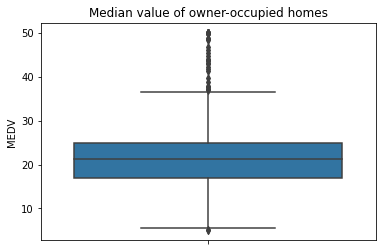

In [3]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y="MEDV", data=boston_df)
ax.set_title("Median value of owner-occupied homes")

**Conclusion:** The median MEDV is slightly above the 20.

Text(0.5, 1.0, 'Charles river variable')

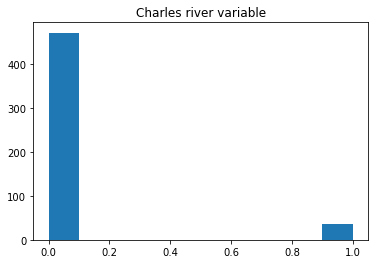

In [4]:
#Provide a  histogram for the Charles river variable
plt.hist(boston_df['CHAS'])
plt.title("Charles river variable")

**Conclusion:** Majority of the homes in Charles River have tract bounded by the river

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

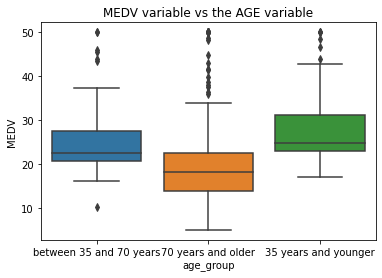

In [5]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
ax.set_title("MEDV variable vs the AGE variable")

**Conclusion:**  We can see that the median MEDV 35 years and younger is higher than the median MEDV of other age groups. Also, the maximum MEDV was seen in home owners aged between 35 years and 70 while the minimum MEDV was seen in 70 years and older age group.

Text(0.5, 1.0, 'Relationship between NOX and INDUS')

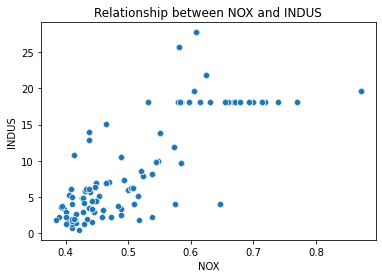

In [6]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax.set_title("Relationship between NOX and INDUS")

**Conclusion:** the plot shows that there exists a relationship between NOX and INDUS as points are clustered around the origin and moving upwards showing upward trend .

Text(0.5, 1.0, 'Pupil to teacher ratio variable')

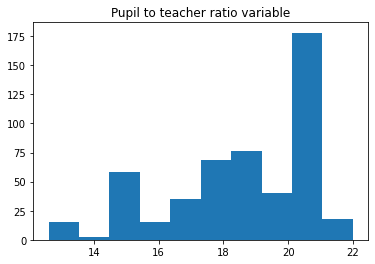

In [7]:
#Create a histogram for the pupil to teacher ratio variable
plt.hist(boston_df['PTRATIO'])
plt.title("Pupil to teacher ratio variable")

**Conclusion:** Distribution of PTRATIO is skewed to the left

### State the hypothesis

* $H\_0: µ\_1 = µ\_2$  ("there is no difference in median value of houses bounded by the Charles river")
* $H\_1: µ\_1 ≠ µ\_2$  ("there is a difference in median value of houses bounded by the Charles river")

In [8]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [9]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river

### State the hypothesis

* $H\_0: µ\_1 = µ\_2$  ("there is no difference in median value of houses built prior to 1940 (AGE)")
* $H\_1: µ\_1 ≠ µ\_2$  ("there is a difference in median value of houses built prior to 1940 (AGE)")

In [10]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
thirty_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirty_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

scipy.stats.levene(thirty_lower,thirty_seventy,seventy_older, center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [11]:
f_statistic, p_value = scipy.stats.f_oneway(thirty_lower,thirty_seventy,seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses built prior to 1940 (AGE)

### State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [12]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           7.91e-98
Time:                        17:36:38   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
r = sqrt(0.583)
print ("r = ", round(r,2))

r =  0.76


**Conclusion:** Since the p-value is Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### State the hypothesis:

*   $H\_0: β1$ = 0 (distance to the five Boston employment centres has no impact on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (distance to the five Boston employment centres has an impact on the median value of owner occupied homes)

In [14]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.21e-08
Time:                        17:36:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in mean distance to the five Boston employment centres. The coefficient 1.0916 means that home owner get to travel 1.0916 additional distances.